In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import sys 
sys.path.append('../../../codes/visualisations_src/')
from utils_distributions import plot_yearly_ts, plot_distribution_by_year, plot_count_distribution_by_year

In [2]:
path2results = "../tables/"
path2annuels = path2results + "annuels/"
path2annuels_flux = path2results + "annuels_flux/"
DEFAULT_YEARS = [2008, 2010, 2012, 2014, 2016]
QUERIED_TABLES = ['DCIR', 'IRBENR', 'IRIMBR']

# Professionels de soins

## DAPRA

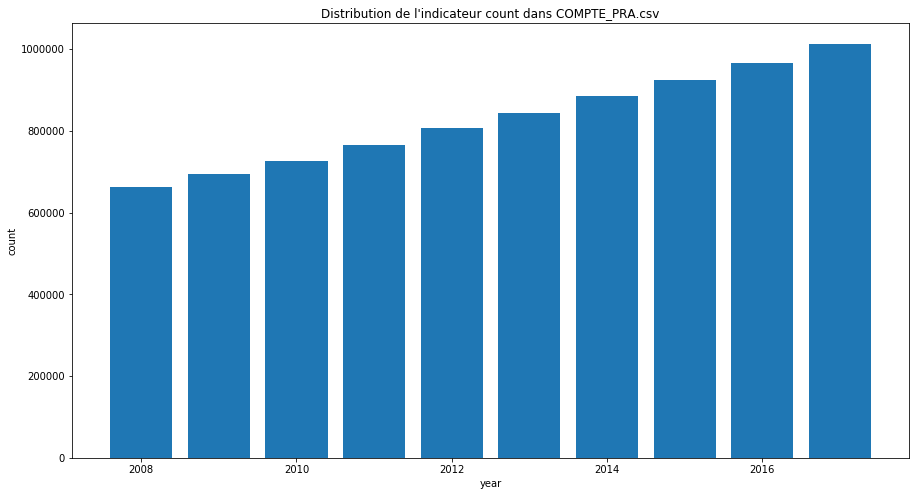

<BarContainer object of 10 artists>

In [3]:
if 'DAPRAR' in QUERIED_TABLES:
    filename = 'COMPTE_PRA.csv'
    df = pd.read_csv(path2annuels+filename)
    df = df.groupby('year', as_index=False).agg({'count':'sum'})
    plot_yearly_ts(df, x_min=2008, x_max=2017, filename=filename, plot_type='bar')

<Figure size 1080x576 with 0 Axes>

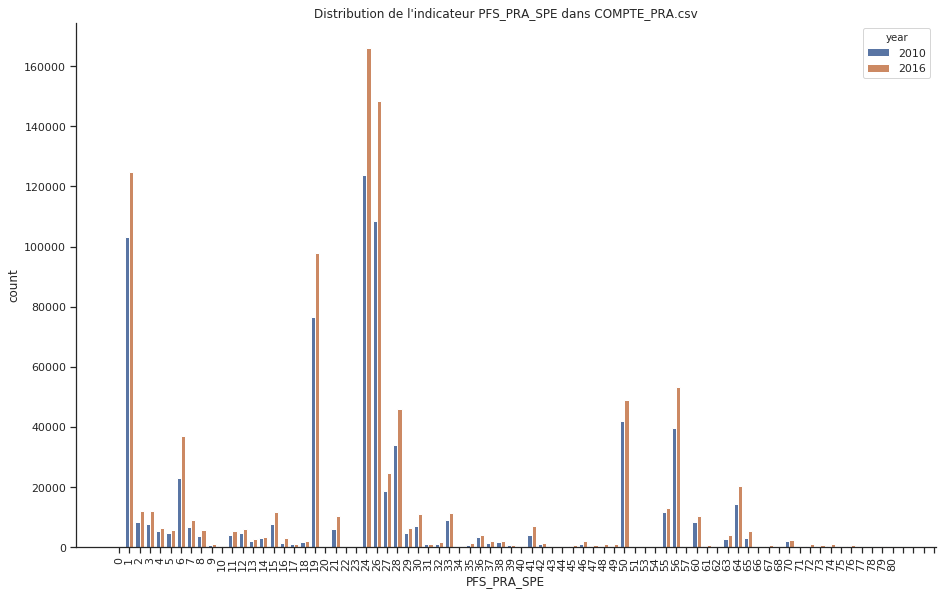

In [4]:
if 'DAPRAR' in QUERIED_TABLES:
    filename = 'COMPTE_PRA.csv'
    df = pd.read_csv(path2annuels+filename)
    plot_count_distribution_by_year(df, years=[2010, 2016], filename=filename, plot_type='grouped_bars')

Pour les généralistes, le chiffre est à mettre au regard des 102300 déclaré par la drees en 2016. Il faudrait regarder le nombre de ces médecins qui ont effectivement une activité dans l'année pour avoir un vrai chiffre.

source: [10 000 médecins de plus depuis 2012, *Marie Anguis, Hélène Chaput et al., ER-05-2018*](https://drees.solidarites-sante.gouv.fr/IMG/pdf/er_1061.pdf)

<Figure size 1080x576 with 0 Axes>

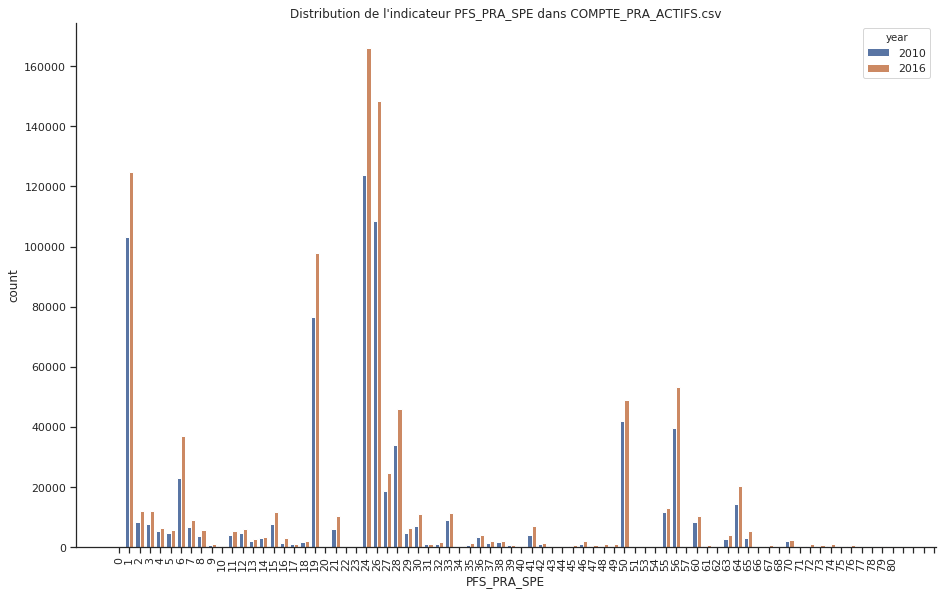

In [5]:
if 'DAPRAR' in QUERIED_TABLES:
    filename = 'COMPTE_PRA_ACTIFS.csv'
    df = pd.read_csv(path2annuels+filename)
    plot_count_distribution_by_year(df, years=[2010, 2016], filename=filename, plot_type='grouped_bars')

## DAPRA depuis DCIR, volume d'actes

<Figure size 1080x576 with 0 Axes>

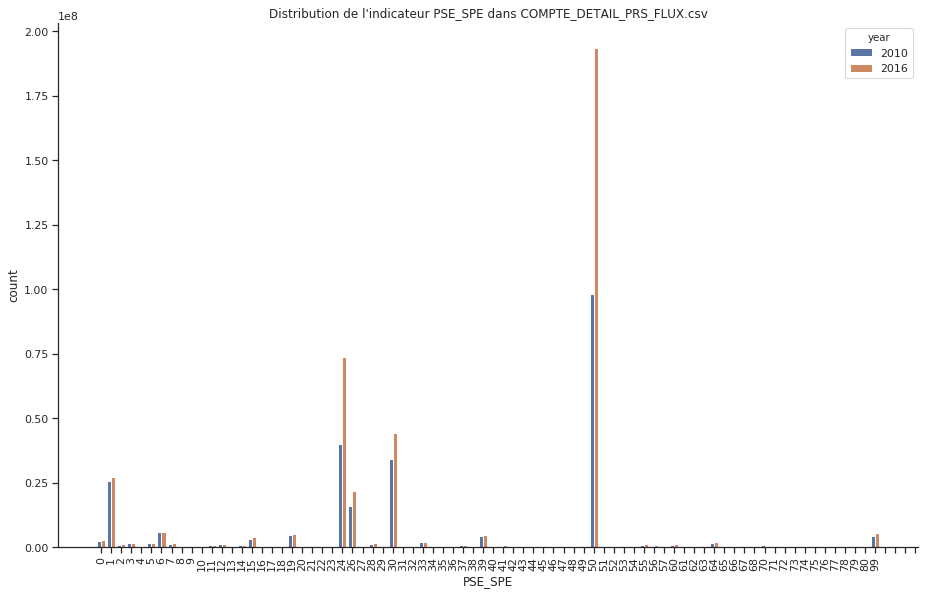

In [6]:
if 'DAPRAR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_PRS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    plot_count_distribution_by_year(df, years=[2010, 2016], filename=filename, plot_type='grouped_bars')

# Patients depuis IRBENR

### Année de naissance

Text(0.5, 1.0, 'Distribution de BEN_NAI_ANN dans IR_BEN_R')

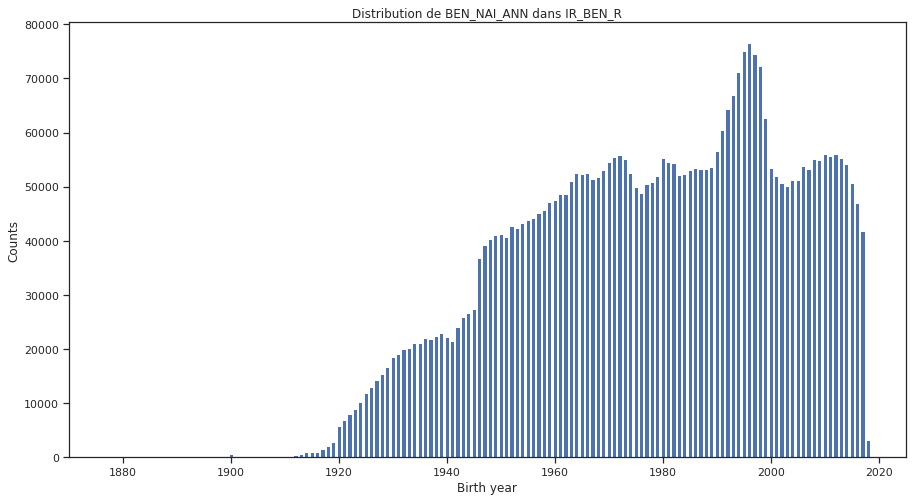

In [7]:
if 'IRBENR' in QUERIED_TABLES:
    figsize = (15, 8)
    df = pd.read_csv(path2annuels + "COMPTE_IRBEN.csv")
    df = df.groupby('BEN_NAI_ANN', as_index=False).agg({'count':'sum'})
    fig = plt.figure(figsize=figsize)
    ax = plt.bar(df["BEN_NAI_ANN"], df["count"])
    plt.xlim(1870, 2025)
    plt.xlabel("Birth year")
    plt.ylabel("Counts")
    plt.title("Distribution de BEN_NAI_ANN dans IR_BEN_R")

### RGM_COD

Text(0.5, 1.0, 'Distribution de RGM_COD dans IR_BEN_R')

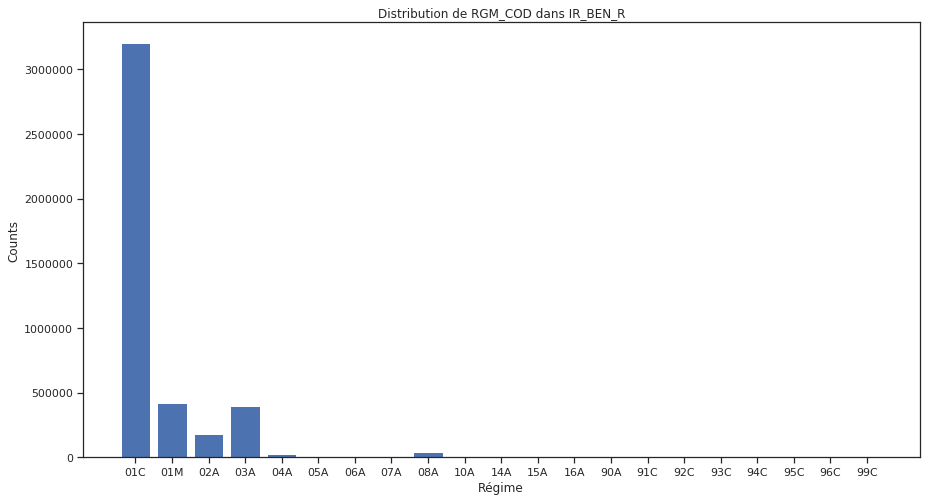

In [8]:
if 'IRBENR' in QUERIED_TABLES:
    df = pd.read_csv(path2annuels + "COMPTE_IRBEN.csv")
    df = df.groupby('RGM_COD', as_index=False).agg({'count':'sum'})
    fig = plt.figure(figsize=figsize)
    ax = plt.bar(df['RGM_COD'], df["count"])
    plt.xlabel("Régime")
    plt.ylabel("Counts")
    plt.title("Distribution de RGM_COD dans IR_BEN_R")

### Sexe ratio

In [9]:
if 'IRBENR' in QUERIED_TABLES:
    filename = path2annuels + 'COMPTE_IRBEN.csv'
    df = pd.read_csv(filename)
    df = df.groupby('BEN_SEX_COD', as_index=False).agg({'count':'sum'})
    df.head()
    nb_femmes = df.loc[df["BEN_SEX_COD"] == 2, "count"].values[0]
    nb_hommes = df.loc[df["BEN_SEX_COD"] == 1, "count"].values[0]
    print("Ratio Femmes = {:.4f} = {}/{}".format(nb_femmes / (nb_femmes + nb_hommes), nb_femmes, nb_femmes + nb_hommes))

Ratio Femmes = 0.5021 = 2150763/4283420


# Patients depuis DCIR

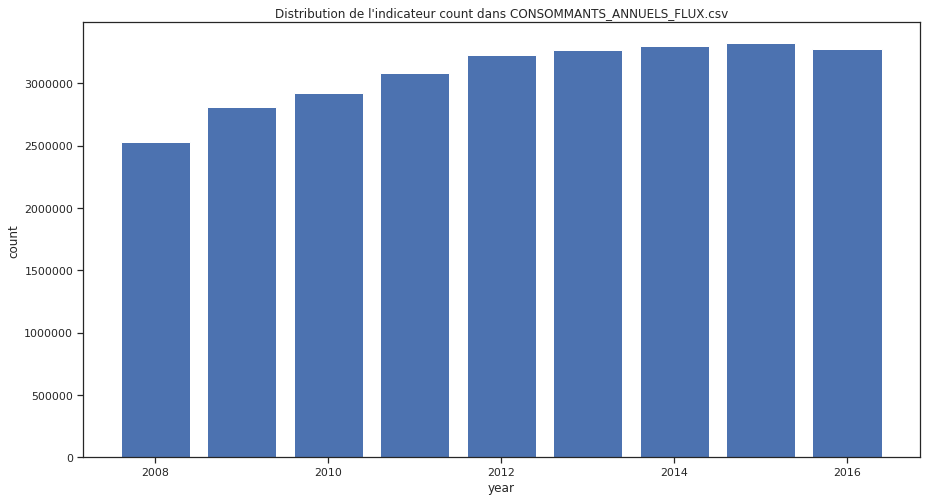

<BarContainer object of 9 artists>

In [10]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'CONSOMMANTS_ANNUELS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df = df.groupby('year', as_index=False).agg({"count": "sum"})
    plot_yearly_ts(df, filename=filename, plot_type='bar')

Filtered left : 16 outliers with mean value 703.31 and 288272/15268073 total counts
Filtered right : 0 outliers with mean value nan and 0/15268073 total counts


<Figure size 1080x576 with 0 Axes>

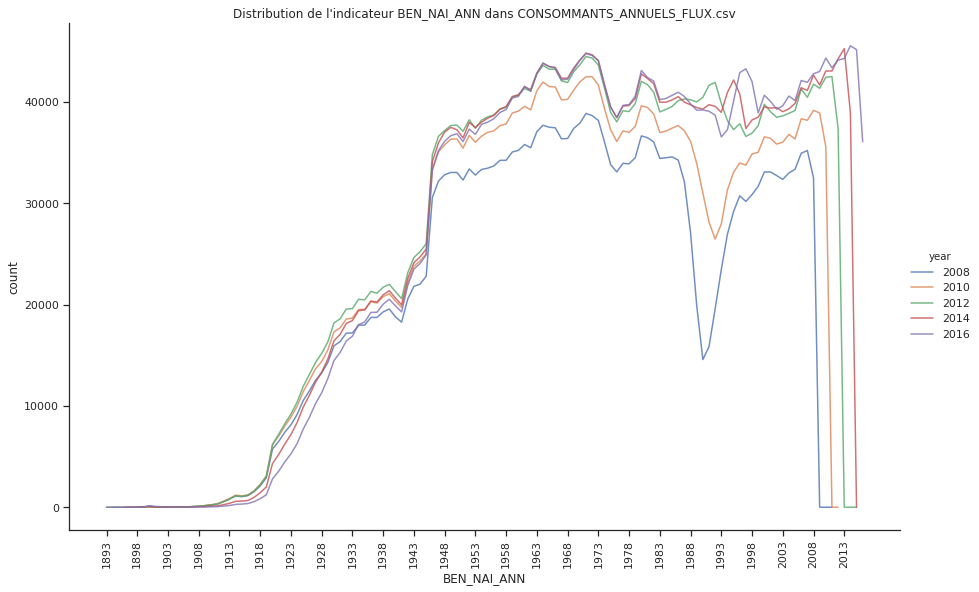

In [11]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'CONSOMMANTS_ANNUELS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df = df.groupby(['year', 'BEN_NAI_ANN'], as_index=False).agg({"count": "sum"})
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='lineplot', xticks_frequency=5, filter_in_range=(1890, 2020))

Filtered left : 5 outliers with mean value 0.00 and 174/15268073 total counts
Filtered right : 5 outliers with mean value 9.00 and 265883/15268073 total counts


<Figure size 1080x576 with 0 Axes>

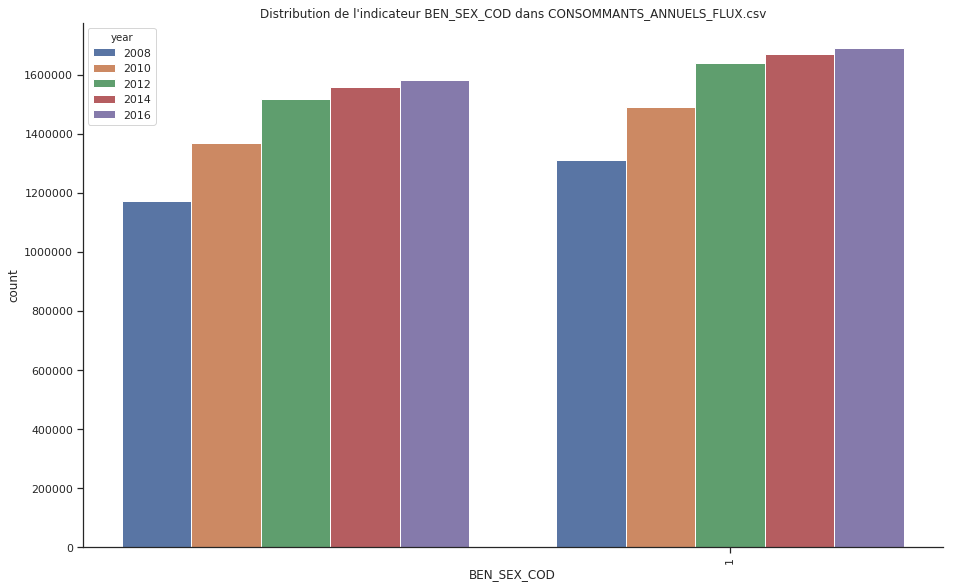

In [12]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'CONSOMMANTS_ANNUELS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df = df.groupby(['year', 'BEN_SEX_COD'], as_index=False).agg({"count": "sum"})
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars', filter_in_range=(1,2))

In [13]:
if 'DCIR' in QUERIED_TABLES:
    year = 2016
    nb_prestas_femmes = df.loc[(df['year']==year) & (df['BEN_SEX_COD'] == 2), 'count'].values[0]
    nb_prestas_hommes = df.loc[(df['year']==year) & (df['BEN_SEX_COD'] == 1), 'count'].values[0]
    ratio = nb_prestas_femmes / (nb_prestas_femmes + nb_prestas_hommes)

    print("Ratio prestastions femmes = {:.4f} = {}/({} + {})".format(ratio, nb_prestas_femmes, nb_prestas_femmes, nb_prestas_hommes))

Ratio prestastions femmes = 0.5169 = 1691543/(1691543 + 1580952)


<Figure size 1080x576 with 0 Axes>

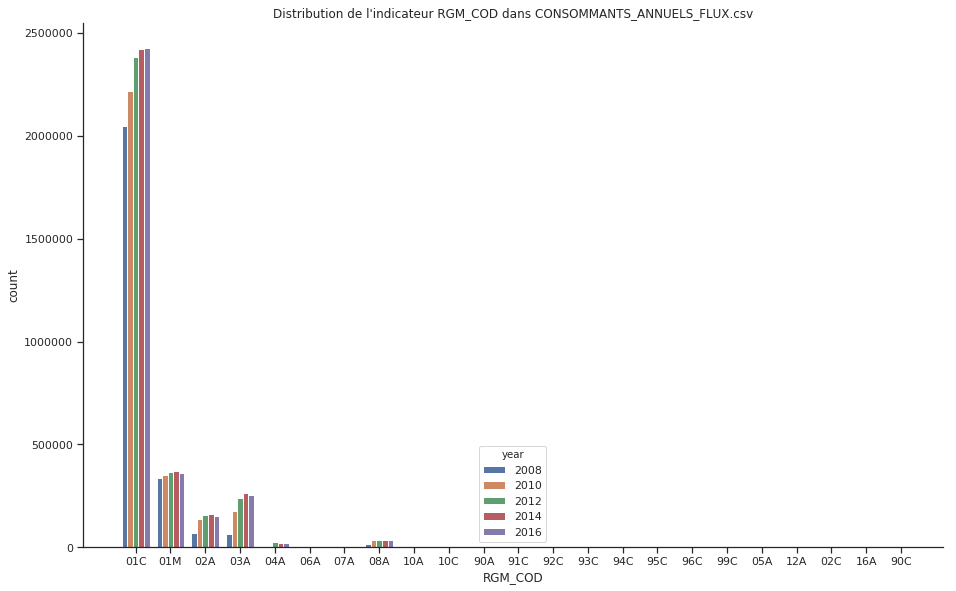

In [14]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'CONSOMMANTS_ANNUELS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df = df.groupby(['year', 'RGM_COD'], as_index=False).agg({"count": "sum"})
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

# ALDs

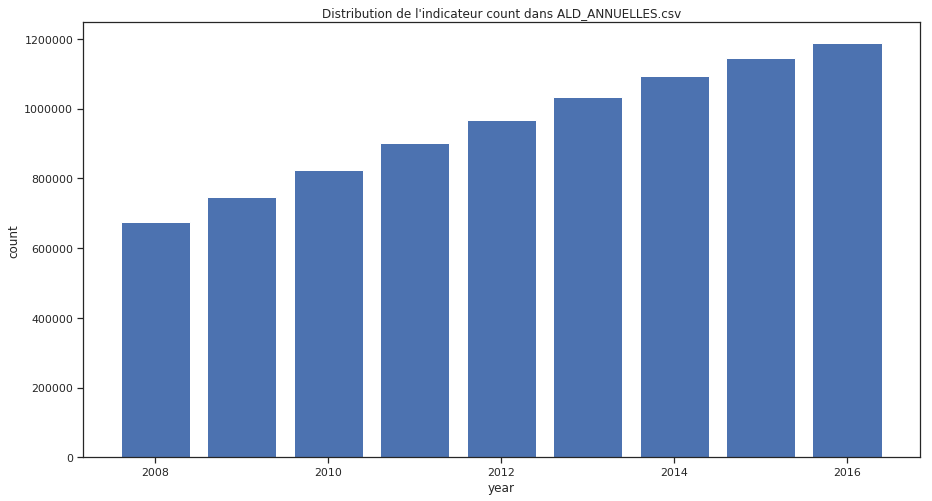

<BarContainer object of 9 artists>

In [15]:
if 'IRIMBR' in QUERIED_TABLES:
    filename = 'ALD_ANNUELLES.csv'
    df = pd.read_csv(path2annuels+filename)
    df = df.groupby('year', as_index=False).agg({"count": "sum"})
    plot_yearly_ts(df, x_min=1950, x_max=2020, filename=filename, plot_type='bar')

Filtered left : 0 outliers with mean value nan and 0/4747419 total counts
Filtered right : 10 outliers with mean value 98.50 and 45153/4747419 total counts


<Figure size 1080x576 with 0 Axes>

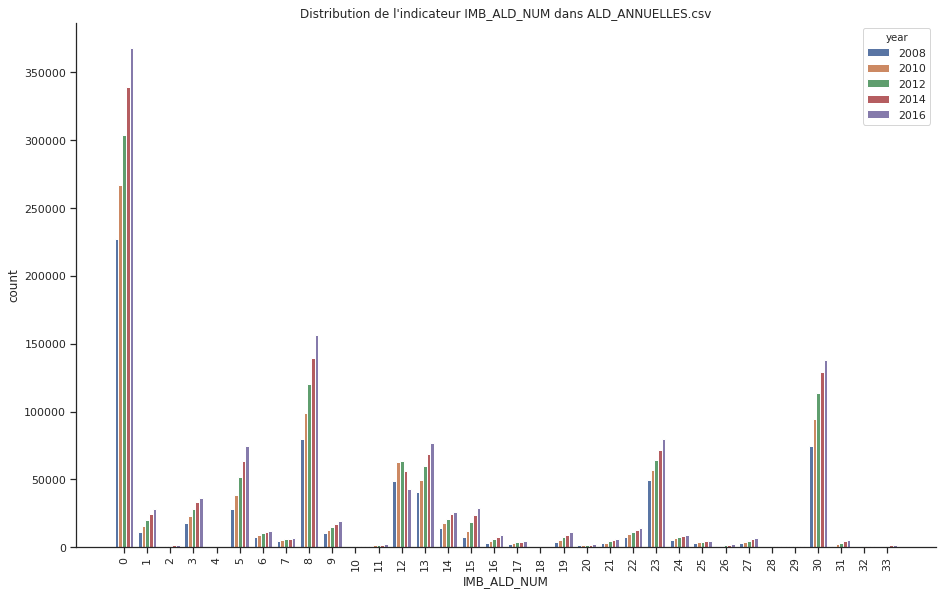

In [16]:
if 'IRIMBR' in QUERIED_TABLES:
    filename = 'ALD_ANNUELLES.csv'
    df = pd.read_csv(path2annuels+filename)
    #df = df.loc[:, ['year', 'IMB_ALD_NUM', 'count']]
    #df.loc[df.year == 2008,:]
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filter_in_range=(0, 35), filename=filename, plot_type='grouped_bars', xticks_frequency=1)

# Comptes détaillés DCIR

<Figure size 1080x576 with 0 Axes>

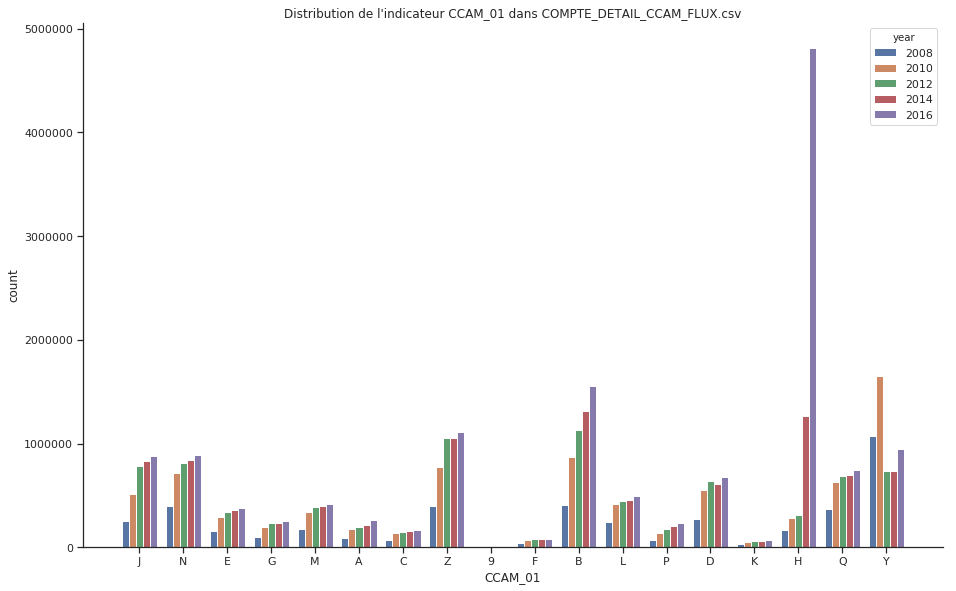

In [17]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_CCAM_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    #df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

On trouve une augmentation énorme des actes en H (système digestif). Apparemment, selon le [site de l'ATIH](https://www.atih.sante.fr/sites/default/files/public/content/2671/introduction_ccam_descriptive_a_usage_pmsi_2015_version_3.pdf) (ou [ici les modifications historiques de la ccam](https://www.atih.sante.fr/version-39-de-la-ccam)), ils ont rajouté de nombreux actes médico-dentaires en 2015, ce qui pourrait expliquer la brutale augmentation des actes de ce chapitre (ex : détartrage des dents sur une arcade (HBJD003)).

<Figure size 1080x576 with 0 Axes>

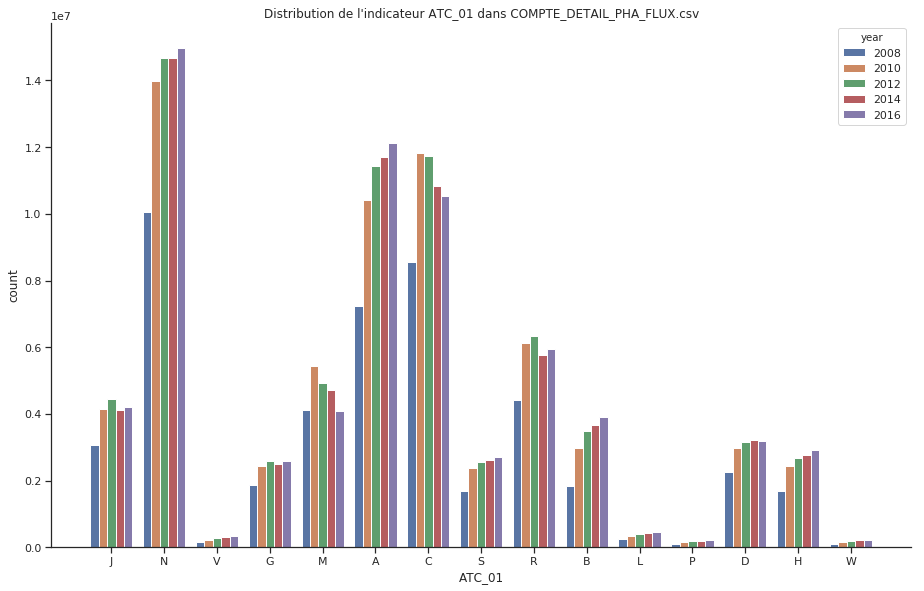

In [18]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_PHA_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    #df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

Filtered left : 0 outliers with mean value nan and 0/679138309 total counts
Filtered right : 18 outliers with mean value 79.00 and 10834352/679138309 total counts


<Figure size 1080x576 with 0 Axes>

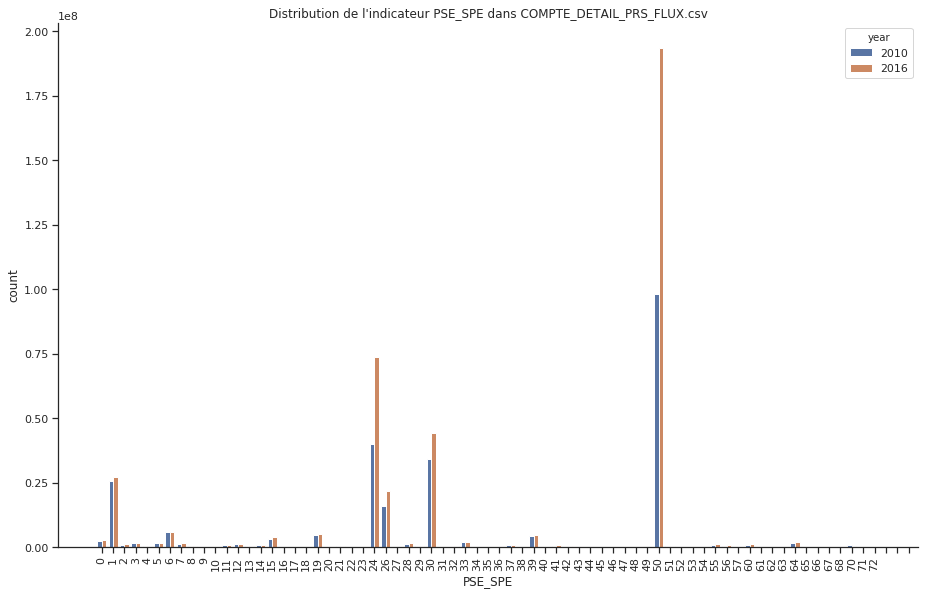

In [19]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_PRS_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df.head()
    plot_count_distribution_by_year(df, years=[2010, 2016], filename=filename, plot_type='grouped_bars', filter_in_range=(0, 72))

A nouveau un bon énorme entre 2014 et 2015, cette fois dûe à la pharmacie en officine.

<Figure size 1080x576 with 0 Axes>

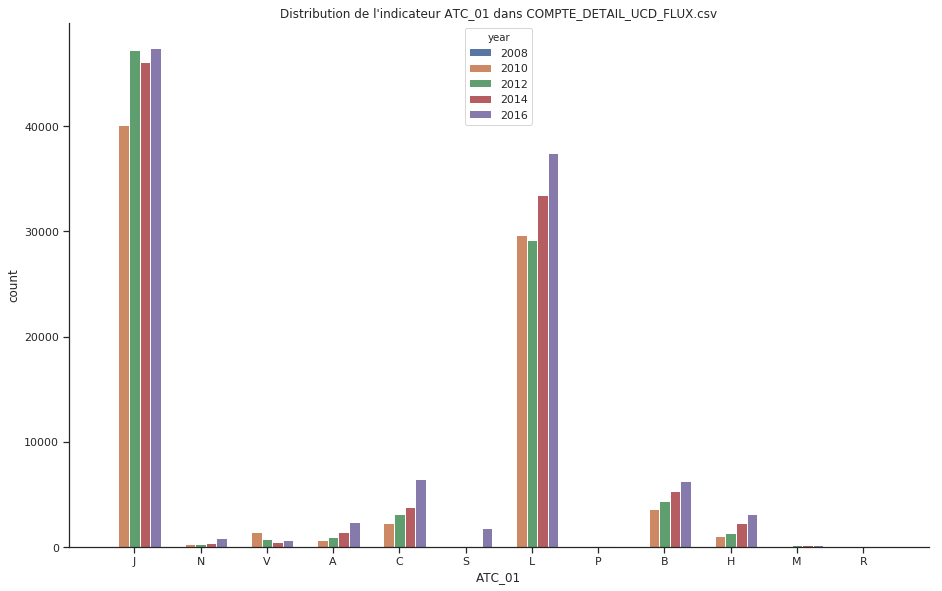

In [20]:
if 'UCD' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_UCD_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars', filter_in_range=None)

Filtered left : 0 outliers with mean value nan and 0/32017071 total counts
Filtered right : 20 outliers with mean value 56.25 and 2785716/32017071 total counts


<Figure size 1080x576 with 0 Axes>

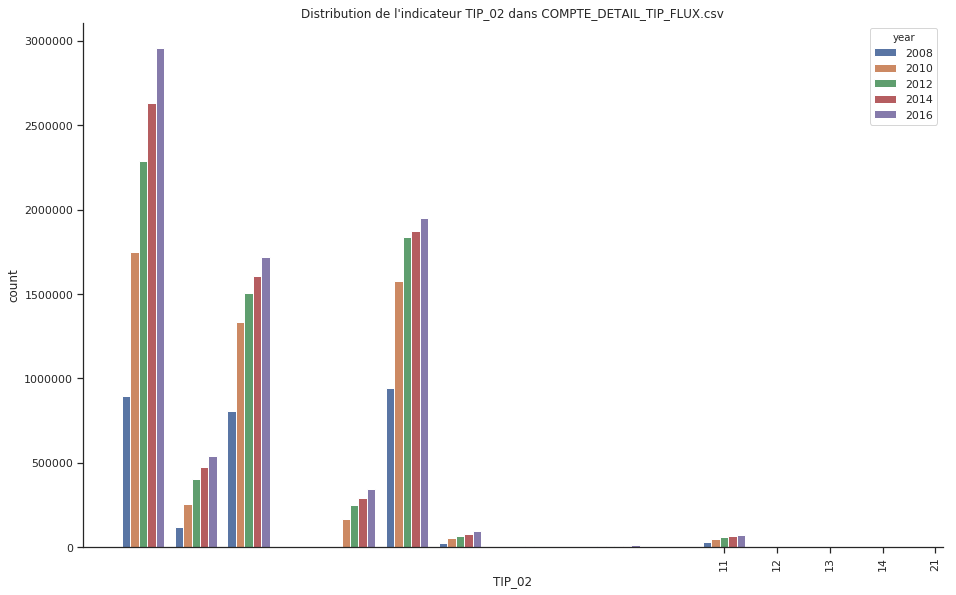

In [21]:
if 'DCIR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_TIP_FLUX.csv'
    df = pd.read_csv(path2annuels_flux+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars', filter_in_range=(0, 35))

# Comptes PMSI

## MCO

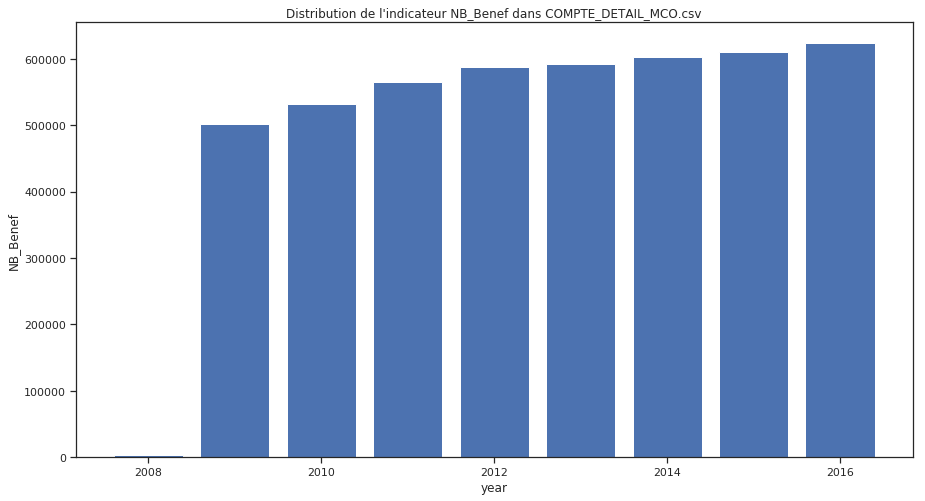

<BarContainer object of 9 artists>

In [22]:
if 'MCO' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_MCO.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_yearly_ts(df, x_min=2008,x_max=2016, filename=filename, plot_type='bar')

<Figure size 1080x576 with 0 Axes>

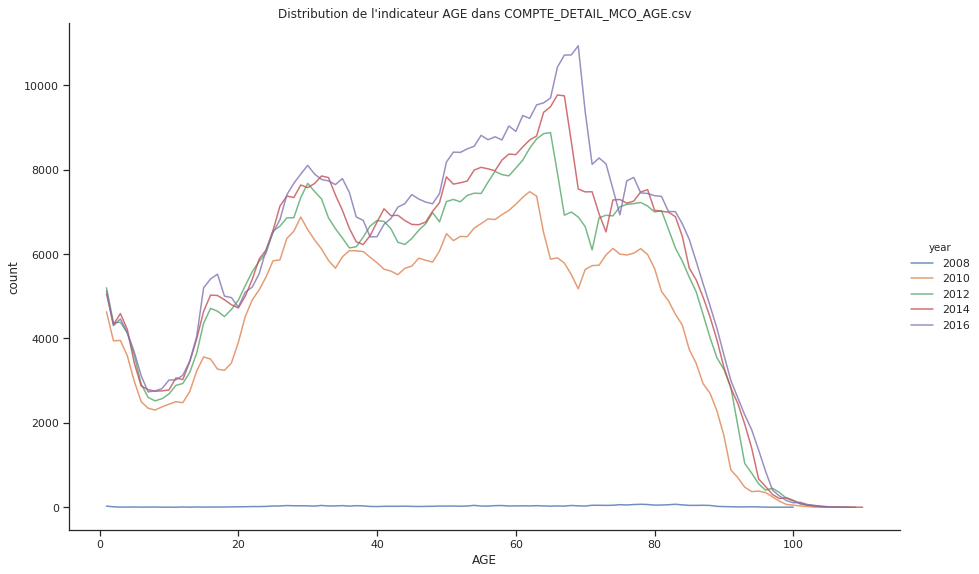

In [23]:
if 'MCO' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_MCO_AGE.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='lineplot', filter_in_range=None)

<Figure size 1080x576 with 0 Axes>

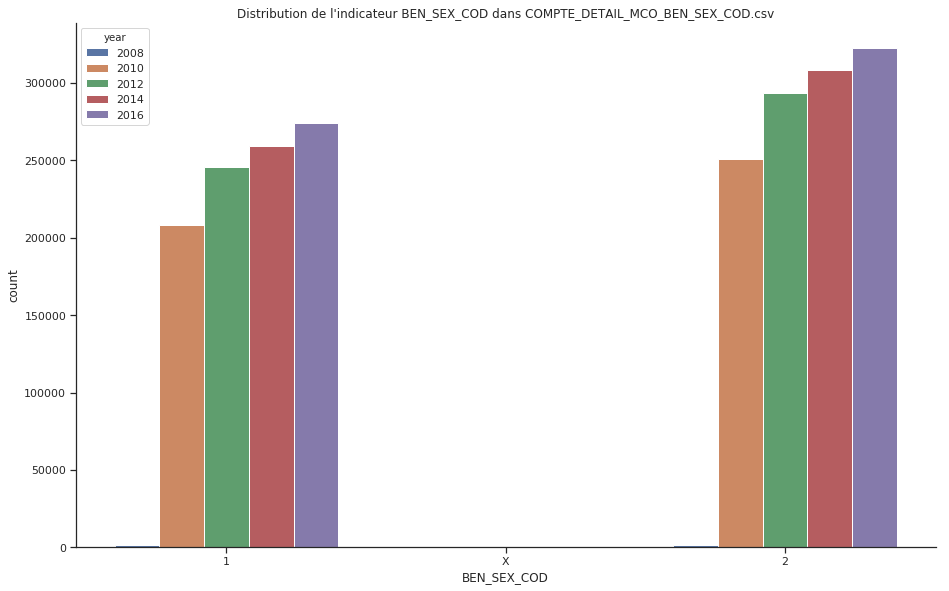

In [24]:
if 'MCO' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_MCO_BEN_SEX_COD.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

## SSR

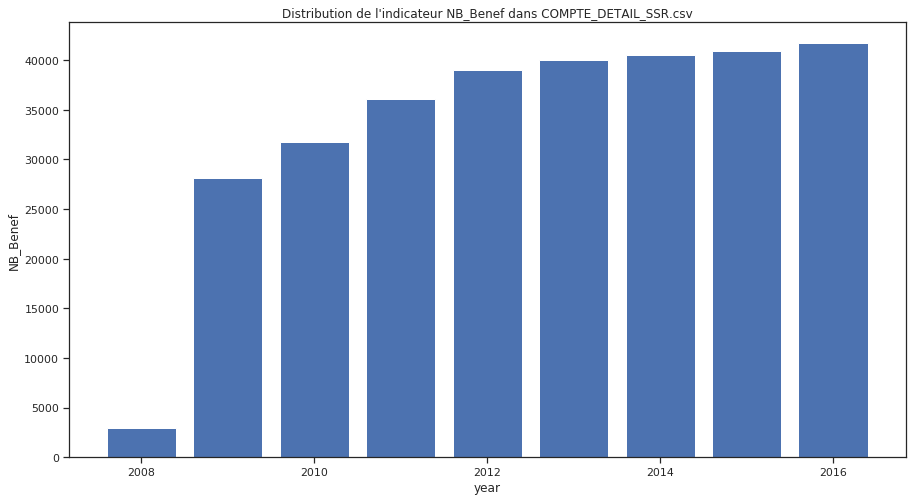

<BarContainer object of 9 artists>

In [25]:
if 'SSR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_SSR.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_yearly_ts(df, x_min=2008,x_max=2016, filename=filename, plot_type='bar')

Filtered left : 0 outliers with mean value nan and 0/152141 total counts
Filtered right : 1 outliers with mean value 999.00 and 316/152141 total counts


<Figure size 1080x576 with 0 Axes>

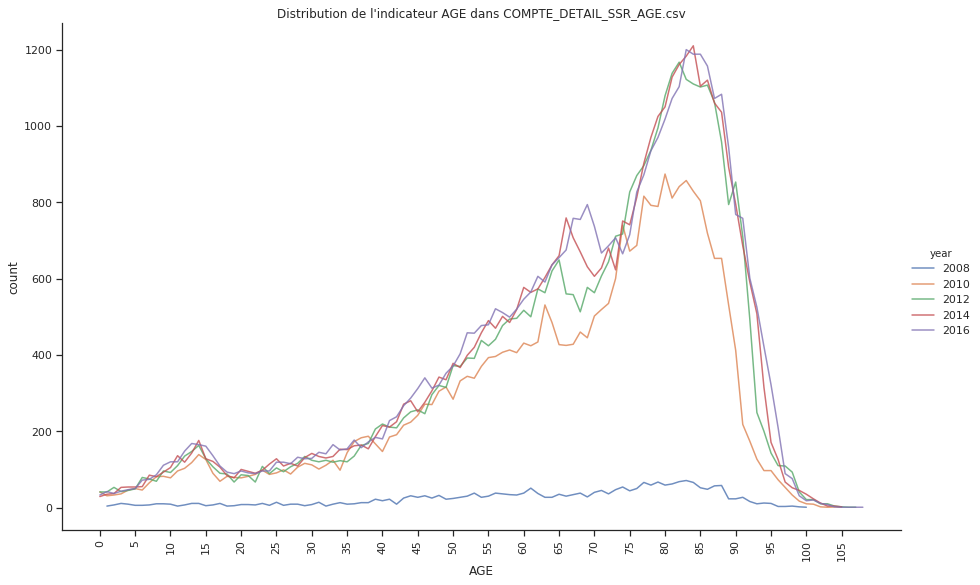

In [26]:
if 'SSR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_SSR_AGE.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='lineplot', filter_in_range=(0, 900), xticks_frequency=5)

<Figure size 1080x576 with 0 Axes>

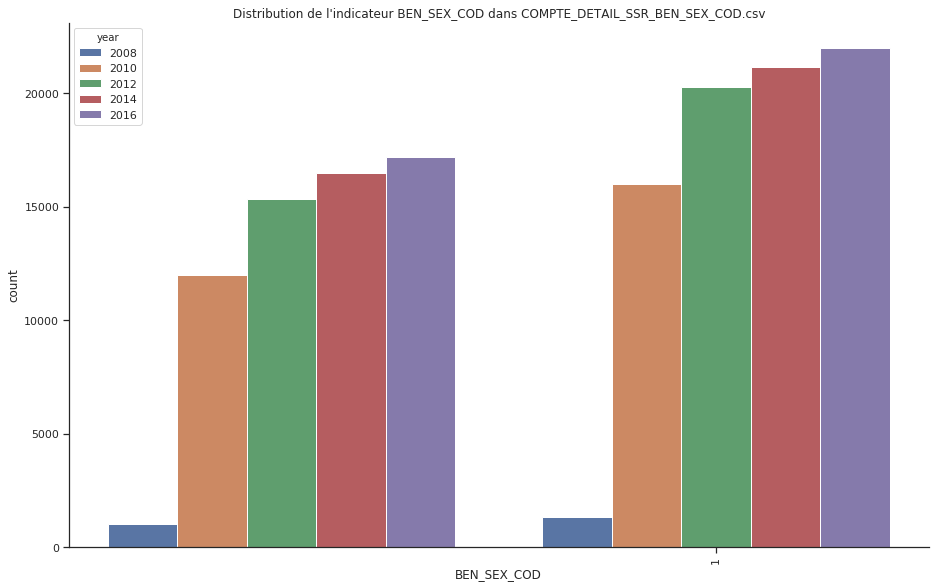

In [27]:
if 'SSR' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_SSR_BEN_SEX_COD.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')

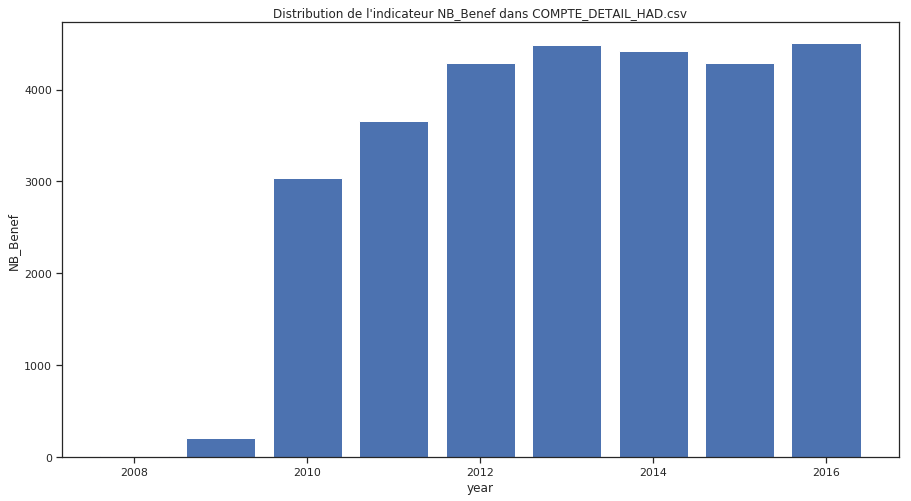

<BarContainer object of 9 artists>

In [28]:
if 'HAD' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_HAD.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_yearly_ts(df, x_min=2008,x_max=2016, filename=filename, plot_type='bar')

Filtered left : 0 outliers with mean value nan and 0/15797 total counts
Filtered right : 0 outliers with mean value nan and 0/15797 total counts


<Figure size 1080x576 with 0 Axes>

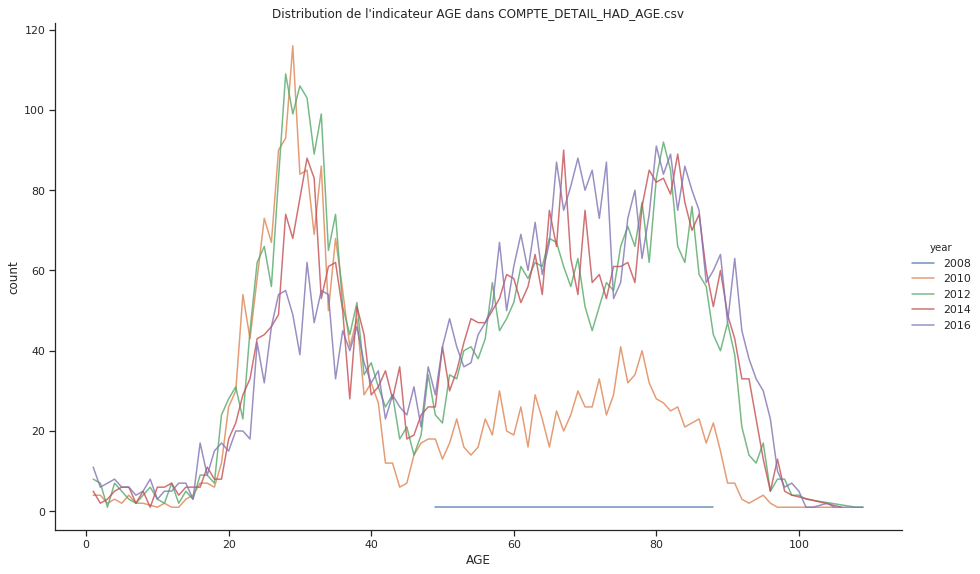

In [29]:
if 'HAD' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_HAD_AGE.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='lineplot', filter_in_range=(0, 900), xticks_frequency=5)

<Figure size 1080x576 with 0 Axes>

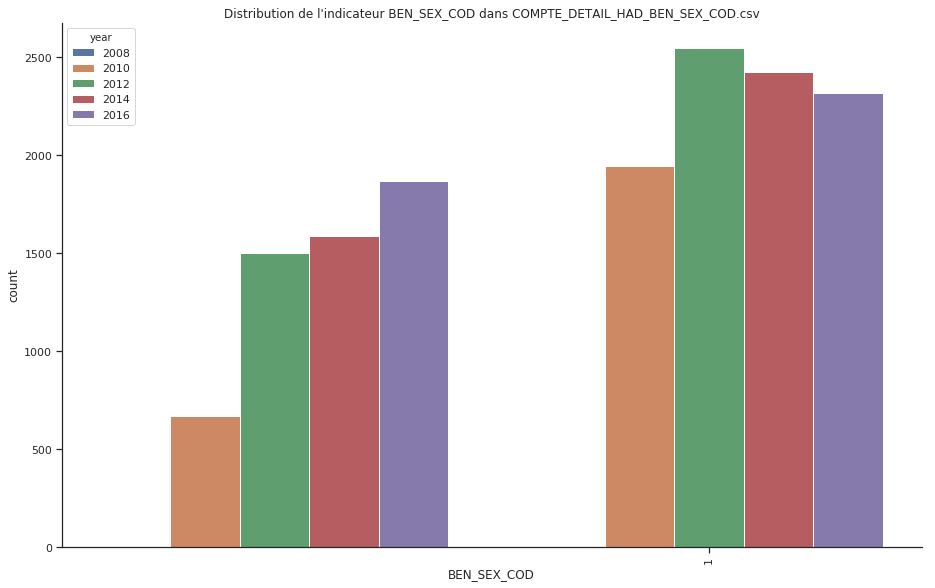

In [30]:
if 'HAD' in QUERIED_TABLES:
    filename = 'COMPTE_DETAIL_HAD_BEN_SEX_COD.csv'
    df = pd.read_csv(path2annuels+filename)
    df.head()
    plot_count_distribution_by_year(df, years=DEFAULT_YEARS, filename=filename, plot_type='grouped_bars')